<a href="https://colab.research.google.com/github/harichandananursing/ITC.Assg/blob/main/MVL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount("/content/drive/")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Mounted at /content/drive/


In [5]:
df = pd.read_csv('/content/drive/MyDrive/datasets/raw_house_data (2).csv')

In [6]:
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",NaN


In [7]:
df.loc[:,'HOA'] = df['HOA'].fillna(0)

df['sqrt_ft'] = df.groupby(['bedrooms', 'bathrooms'])['sqrt_ft'].transform(lambda x: x.fillna(x.mean()))
df.loc[:, 'sqrt_ft'] = df['sqrt_ft'].fillna(df['sqrt_ft'].mean())


df.loc[:, 'kitchen_features'] = df['kitchen_features'].fillna(df['kitchen_features'].mode()[0])

df.loc[:, 'lot_acres'] = df['lot_acres'].fillna(df['lot_acres'].median())
df.loc[:, 'garage'] = df['garage'].fillna(df['garage'].median())
df.loc[:, 'bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df.loc[:, 'floor_covering'] = df['floor_covering'].fillna(df['floor_covering'].mode()[0])


In [8]:
#Convert Columns/features to float
df["fireplaces"] = pd.to_numeric(df["fireplaces"], errors='coerce')
df["fireplaces"] =df["fireplaces"].fillna(df["fireplaces"].median())

df["HOA"] = pd.to_numeric(df["HOA"], errors='coerce')
df["HOA"] = df["HOA"].fillna(df["HOA"].median())

In [9]:
num_cols = df.select_dtypes(include= [np.number]).columns

In [10]:
cln_dataset = df[num_cols].copy()

In [11]:
# saving the cleaned dataset from the above dataframe
cln_dataset.to_csv('cln_dataset.csv', index=False)

In [12]:
df = cln_dataset
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.00000,0.0,6.0,0.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.00000,0.0,5.0,0.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,2678.59434,3.0,5.0,0.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.00000,4.0,4.0,0.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.00000,3.0,5.0,55.0


In [13]:
# pps : price_per_sqft
df['pps'] = df['sold_price']/df['sqrt_ft']

In [14]:
df['price_category'] = pd.qcut(df['pps'], 20 , labels = False)

In [15]:
# KNN
X_train = df[['longitude', 'latitude']].copy().to_numpy()
y_KNN = df['price_category'].copy().to_numpy()

In [16]:
class KNNClassifier():
  def fit(self, X,y):
    self.X = X
    self.y = y


  def predict(self, X, k, epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)


    for i in range(N):
      dist2 = np.sum(((self.X-X[i])**2), axis=1)
      idxt = np.argsort(dist2)[:k]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

    return y_hat

In [17]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [18]:
knn = KNNClassifier()
knn.fit(X_train,y_KNN)


In [19]:
y_hat = knn.predict(X_train,3)

In [20]:
accuracy = np.mean(y_hat==y_KNN)
accuracy

0.9042

In [21]:
df['KNN_PRICE_CATEGORY'] = y_hat

In [22]:
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,pps,price_category,KNN_PRICE_CATEGORY
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.00000,0.0,6.0,0.0,504.761905,19,19.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.00000,0.0,5.0,0.0,575.342466,19,19.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,2678.59434,3.0,5.0,0.0,1567.986588,19,4.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.00000,4.0,4.0,0.0,498.946668,19,19.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.00000,3.0,5.0,55.0,533.372420,19,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.00000,3.0,1.0,0.0,137.461816,0,0.0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.00000,3.0,1.0,43.0,237.273512,15,9.0
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.00000,0.0,0.0,0.0,268.058691,17,17.0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.00000,3.0,1.0,0.0,147.690655,1,1.0


In [23]:
df["rooms"] = df["bedrooms"] + df["bathrooms"]

In [24]:
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,pps,price_category,KNN_PRICE_CATEGORY,rooms
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.00000,0.0,6.0,0.0,504.761905,19,19.0,23.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.00000,0.0,5.0,0.0,575.342466,19,19.0,4.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,2678.59434,3.0,5.0,0.0,1567.986588,19,4.0,5.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.00000,4.0,4.0,0.0,498.946668,19,19.0,12.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.00000,3.0,5.0,55.0,533.372420,19,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.00000,3.0,1.0,0.0,137.461816,0,0.0,8.0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.00000,3.0,1.0,43.0,237.273512,15,9.0,7.0
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.00000,0.0,0.0,0.0,268.058691,17,17.0,5.0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.00000,3.0,1.0,0.0,147.690655,1,1.0,8.0


In [25]:
# Features for the linear regressor
features = ['KNN_PRICE_CATEGORY', 'sqrt_ft', 'lot_acres', 'fireplaces', 'garage', 'rooms']
X_reg = df[features].to_numpy()
y_reg = df['sold_price'].to_numpy()

In [26]:
# This is important for gradient descent to work well
X_scaled = (X_reg - np.mean(X_reg, axis=0)) / np.std(X_reg, axis=0)

# Scale target variable (will help with the learning rate)
y_scaled = (y_reg - np.mean(y_reg)) / np.std(y_reg)

In [27]:
#  MULTI VARIATE REGRESSION

R-squared score: 0.6957
KNN_PRICE_CATEGORY importance: 0.5734
sqrt_ft importance: 0.6981
lot_acres importance: 0.2534
fireplaces importance: 0.0881
garage importance: 0.0446
rooms importance: 0.1959

Mean Absolute Error: $93,790.06


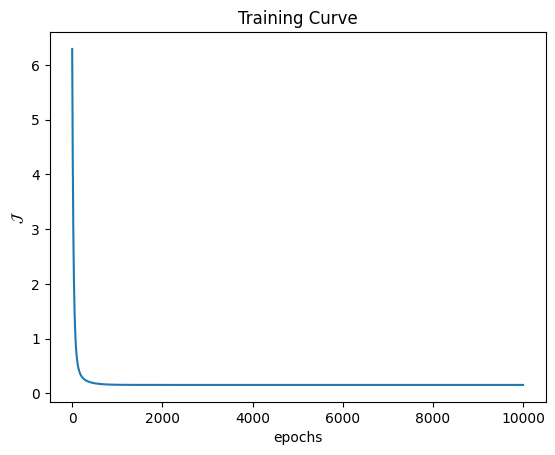

In [28]:
# Define the OLS (Ordinary Least Squares) function
def OLS(y, y_hat, N):
    return (1/(2*N)) * np.sum((y_hat - y)**2)

class MVLinearRegression():
    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
        epochs = int(epochs)
        N, D = X.shape
        Y = y

        # Begin Optimization
        self.W = np.random.randn(D)
        self.J = np.zeros(epochs)

        # Stochastic Gradient Descent
        for epoch in range(epochs):
            Y_hat = self.predict(X)
            self.J[epoch] = OLS(Y, Y_hat, N)
            # Weight Update Rule
            self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

        if show_curve:
            plt.figure()
            plt.plot(self.J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")

    def predict(self, X):
        return X@self.W

# Create and train the model
my_reg = MVLinearRegression()

# Try these parameters first
my_reg.fit(X_scaled, y_scaled, eta=1e-2, epochs=1e4, show_curve=True)

# Make predictions
y_pred_scaled = my_reg.predict(X_scaled)

# Unscale predictions to get actual prices
y_pred = (y_pred_scaled * np.std(y_reg)) + np.mean(y_reg)

# Calculate R-squared
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score(y_reg, y_pred)
print(f"R-squared score: {r2:.4f}")

# Print feature importance
for feature, weight in zip(features, my_reg.W):
    print(f"{feature} importance: {abs(weight):.4f}")

# Calculate Mean Absolute Error
mae = np.mean(np.abs(y_reg - y_pred))
print(f"\nMean Absolute Error: ${mae:,.2f}")

In [29]:
# Testing

In [30]:
lat_lon = np.array([[32.203350, -110.997150]])
single_prediction = knn.predict(lat_lon, k=3)
single_prediction

array([4.])

In [31]:
test_data = pd.DataFrame({
    'knn_price_category': [4],
    'lot_acres': [0.2],
    'sqrt_ft': [1629],
    'fireplaces': [1],
    'garage': [2],
    'rooms': [6]
})

In [35]:
feature_means = np.mean(X_reg, axis=0)
feature_stds = np.std(X_reg, axis=0)


test_features = test_data[['knn_price_category', 'lot_acres', 'sqrt_ft', 'fireplaces', 'garage', 'rooms']]
test_features_standardized = (test_features - feature_means) / feature_stds

predicted_price = my_reg.predict(test_features_standardized)

# Print the prediction
print(f"Predicted house price: {predicted_price[0]:,.2f}")

Predicted house price: 5.22
